In [1]:
import plotly.express as px
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import panel as pn
from panel.interact import interact
import hvplot.pandas as hvplot

from dotenv import load_dotenv
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
F:\ProgramFiles\Anaconda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
load_dotenv()
mapbox_api = os.getenv("mapbox_key")

In [3]:
#Building Main Data Frame with Opportunity Ratio and saving as zall_df.csv to ../data/clean_data
prop_value_df = pd.read_csv(Path("../data/clean_data/ZCON.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_df["YEAR"] = pd.DatetimeIndex(prop_value_df["YEAR"]).year
#prop_valuezall_df = prop_value_df.groupby(["YEAR","ZIPCODE"],as_index = True).sum()
#prop_value_df.head
#prop_value_df["AVG_VALUE"].dtypes
avg_income_df = pd.read_csv(Path("../data/clean_data/avg_income.csv"), header = 0, names = ["YEAR","ZIPCODE","AVG_INCOME"], infer_datetime_format=True, parse_dates=True, dtype = {"avg_income" : np.float64})
#avg_income_df = avg_income_df.groupby(["YEAR","ZIPCODE"],as_index = True).mean()
#avg_income_df.head
#avg_income_df["AVG_INCOME"].dtypes
lat_long_df = pd.read_excel(Path("../data/lat_long_by_zip_code.xlsx"), header = 0, usecols = ["Zip Code","Latitude","Longitude"])
lat_long_df = lat_long_df.rename(columns = {"Zip Code": "ZIPCODE", "Latitude": "LATITUDE" ,"Longitude": "LONGITUDE"})
#lat_long_df = lat_long_df.groupby(["ZIPCODE"],as_index = True).mean()
#lat_long_df.head
zall_df = pd.merge(pd.merge(avg_income_df, prop_value_df, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")
#main_df = pd.merge(pd.merge(prop_value_df, avg_income_df, how = "inner", on = "YEAR"), lat_long_df, how = "inner", on = "ZIPCODE")
zall_df["OPPORTUNITY_RATIO"] = zall_df["AVG_INCOME"].astype(float) / zall_df["AVG_PROP"].astype(float)
zall_df = zall_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()
#zall_df.to_csv("../data/clean_data/zall_df.csv") 
zall_df.head()
#zall_df.dtypes

AVG_INCOME       AVG_PROP  LATITUDE  LONGITUDE  \
YEAR CITY   ZIPCODE                                                      
2007 Austin 78613     68146.254591  236119.916667   30.5052   -97.8203   
            78660     53026.718649  178322.000000   30.4421   -97.6299   
            78664     53795.392731  164835.833333   30.5145   -97.6680   
            78681     75921.291820  160508.166667   30.5083   -97.6789   
            78701    151042.360061  390433.583333   30.2713   -97.7426   

                     OPPORTUNITY_RATIO  
YEAR CITY   ZIPCODE                     
2007 Austin 78613             0.288739  
            78660             0.297515  
            78664             0.326453  
            78681             0.473093  
            78701             0.387204

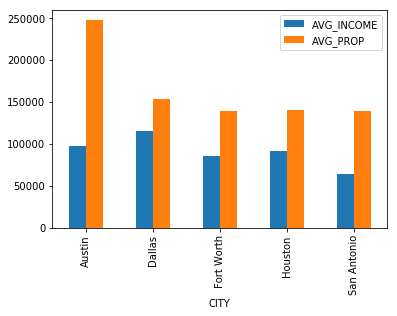

In [4]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
all_time_IVP_city_df = zall_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
all_time_IVP_city_df = all_time_IVP_city_df.groupby("CITY").mean()
#all_time_IVP_city_df.head
#all_time_IVP_city_df.dtypes

all_time_IVP_city_df.plot.bar()


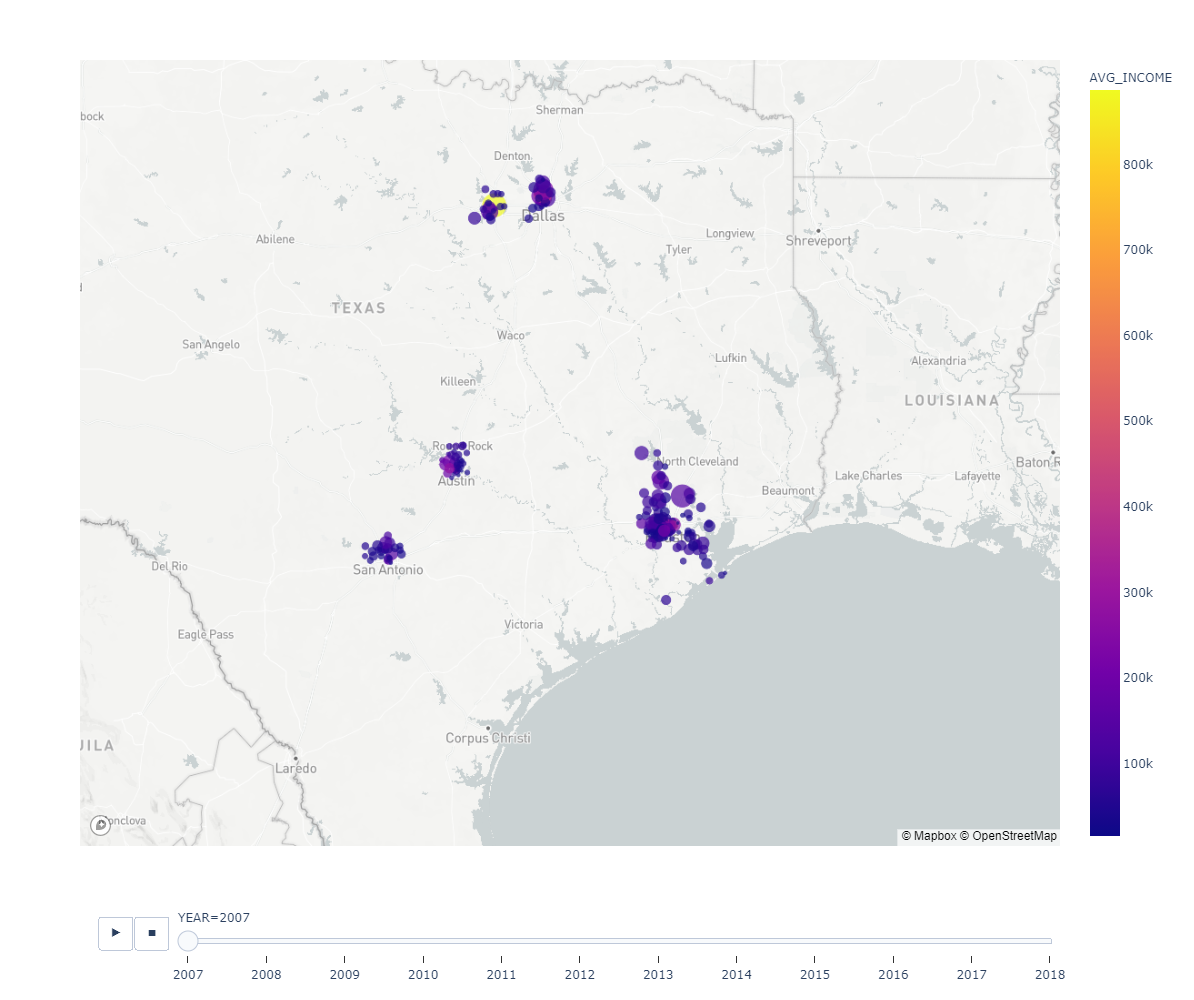

In [5]:
# Read the Mapbox API key
zall_df = zall_df.reset_index()

#zall_df.head()
#zall_df.dtypes

# Set the Mapbox API
px.set_mapbox_access_token(mapbox_api)

map_plot = px.scatter_mapbox(
    zall_df,
    lat="LATITUDE",
    lon="LONGITUDE",
    size="OPPORTUNITY_RATIO",
    color="AVG_INCOME",
    hover_name="ZIPCODE",
    animation_frame="YEAR",
    height = 1000,
    zoom=6
)

map_plot.show()


In [6]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
time_series = zall_df.groupby(["CITY","YEAR"]).mean()

time_series_plot = time_series.hvplot.line(
                x="YEAR",
                y=["AVG_PROP", "AVG_INCOME"],
                groupby="CITY",
                title="TTS"
)

time_series_plot


:DynamicMap   [CITY]
   :NdOverlay   [Variable]
      :Curve   [YEAR]   (value)

In [7]:
zall_df=zall_df.reset_index()


In [8]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
time_series = zall_df.groupby(["CITY","YEAR"]).mean()
time_series =time_series.reset_index()
time_series.head()
time_series_austin = time_series[time_series["CITY"] =="Austin"]

time_series_houston = time_series[time_series["CITY"] =="Houston"]

time_series_dallas = time_series[time_series["CITY"] =="Dallas"]

time_series_san_ant = time_series[time_series["CITY"] =="San Antonio"]

time_series_fw = time_series[time_series["CITY"] =="Fort Worth"]



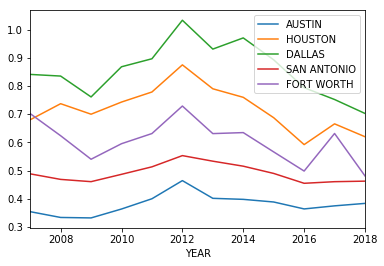

In [9]:


ax=time_series_austin.plot.line(x="YEAR", y="OPPORTUNITY_RATIO")
time_series_houston.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_dallas.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_san_ant.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_fw.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])



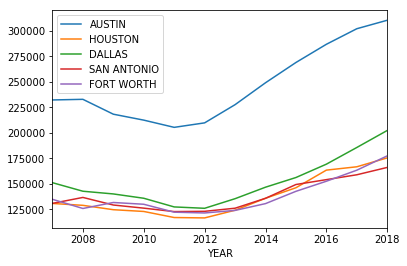

In [10]:
#Line plot showing property value over time in sample cities
ax=time_series_austin.plot.line(x="YEAR", y="AVG_PROP")
time_series_houston.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_dallas.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_san_ant.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_fw.plot(ax=ax, x="YEAR", y="AVG_PROP")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])

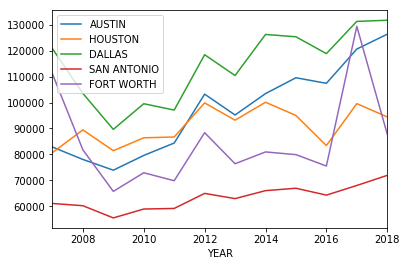

In [11]:
#Line plot showing income over time in sample cities
ax=time_series_austin.plot.line(x="YEAR", y="AVG_INCOME")
time_series_houston.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_dallas.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_san_ant.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_fw.plot(ax=ax, x="YEAR", y="AVG_INCOME")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])